In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('fb_stock_prices_2018.csv')
df

,date,open,high,low,close,volume
0,2018-01-02,177.68,181.58,177.5500,181.42,18151903
1,2018-01-03,181.88,184.78,181.3300,184.67,16886563
2,2018-01-04,184.90,186.21,184.0996,184.33,13880896
3,2018-01-05,185.59,186.90,184.9300,186.85,13574535
4,2018-01-08,187.20,188.90,186.3300,188.28,17994726
...,...,...,...,...,...,...
246,2018-12-24,123.10,129.74,123.0200,124.06,22066002
247,2018-12-26,126.00,134.24,125.8900,134.18,39723370
248,2018-12-27,132.44,134.99,129.6700,134.52,31202509
249,2018-12-28,135.34,135.92,132.2000,133.20,22627569


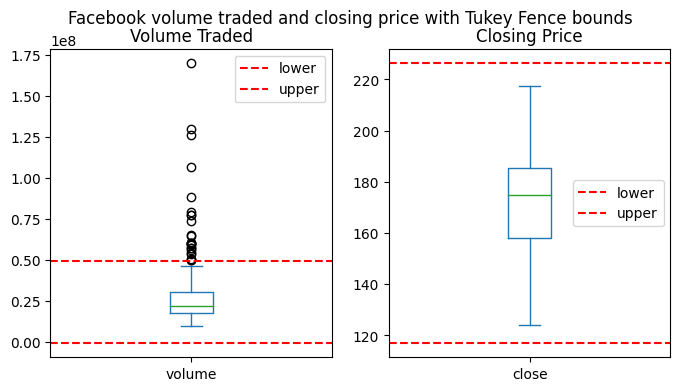

In [8]:
col = ['volume', 'close']

quan = df[col].quantile([0.25,0.75])
quan.loc['iqr',:] = quan.loc[0.75,:]-quan.loc[0.25,:]

ax = df[col].plot(kind='box',subplots=True,figsize=(8,4),title=['Volume Traded', 'Closing Price'])
for ax,col in zip(ax, col):
    S = quan[col]
    lower = S.loc[0.25] - 1.5*S['iqr']
    upper = S.loc[0.75] + 1.5*S['iqr']
    for i,j in zip([lower, upper], ['lower', 'upper']):
        ax.axhline(i,color='red', linestyle='dashed',label=j)
        ax.legend()

plt.suptitle('Facebook volume traded and closing price with Tukey Fence bounds')
plt.show()

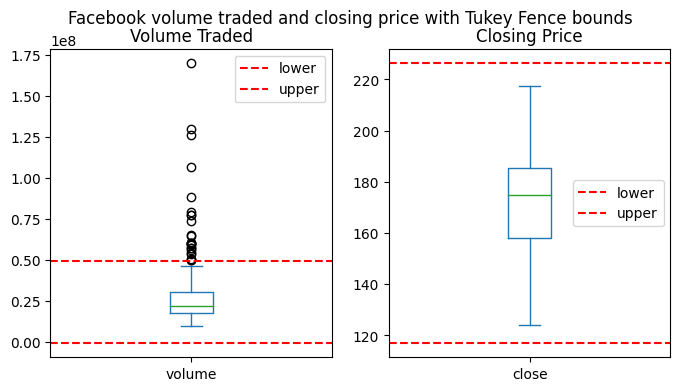

In [10]:
#Step1
col = ['volume', 'close']

quan = df[col].quantile([0.25,0.75])
quan.loc['iqr',:] = quan.loc[0.75,:]-quan.loc[0.25,:]

ax = df[col].plot(kind='box',subplots=True,figsize=(8,4),title=['Volume Traded', 'Closing Price'])
for ax,col in zip(ax, col):
    S = quan[col]
    lower = S.loc[0.25] - 1.5*S['iqr']
    upper = S.loc[0.75] + 1.5*S['iqr']
    for i,j in zip([lower, upper], ['lower', 'upper']):
        ax.axhline(i,color='red', linestyle='dashed',label=j)
        ax.legend()

plt.suptitle('Facebook volume traded and closing price with Tukey Fence bounds')
plt.show()

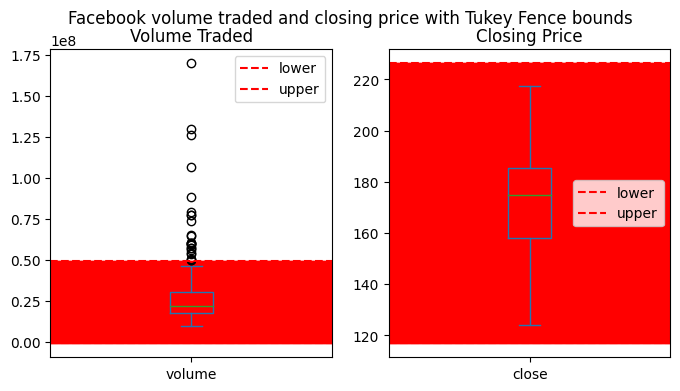

In [12]:
#Step2
col = ['volume', 'close']

quan = df[col].quantile([0.25,0.75])
quan.loc['iqr',:] = quan.loc[0.75,:]-quan.loc[0.25,:]

ax = df[col].plot(kind='box',subplots=True,figsize=(8,4),title=['Volume Traded', 'Closing Price'])
for ax,col in zip(ax, col):
    S = quan[col]
    lower = S.loc[0.25] - 1.5*S['iqr']
    upper = S.loc[0.75] + 1.5*S['iqr']
    for i,j in zip([lower, upper], ['lower', 'upper']):
        ax.axhline(i,color='red', linestyle='dashed',label=j)
        ax.fill_between(ax.get_xlim(), lower, upper, color='red')
        ax.legend()

plt.suptitle('Facebook volume traded and closing price with Tukey Fence bounds')
plt.show()

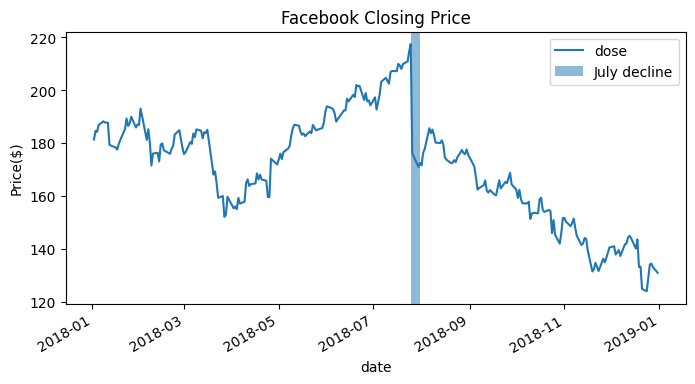

In [23]:
#Step3
df = pd.read_csv('fb_stock_prices_2018.csv',index_col='date', parse_dates=True)

ax = df['close'].plot(kind='line',figsize=(8,4),label='dose')
plt.axvspan('2018-07-25','2018-07-31',alpha=0.5,label='July decline')
plt.xlabel('date')
plt.ylabel('Price($)')
plt.title('Facebook Closing Price')

ax.legend()
plt.show()

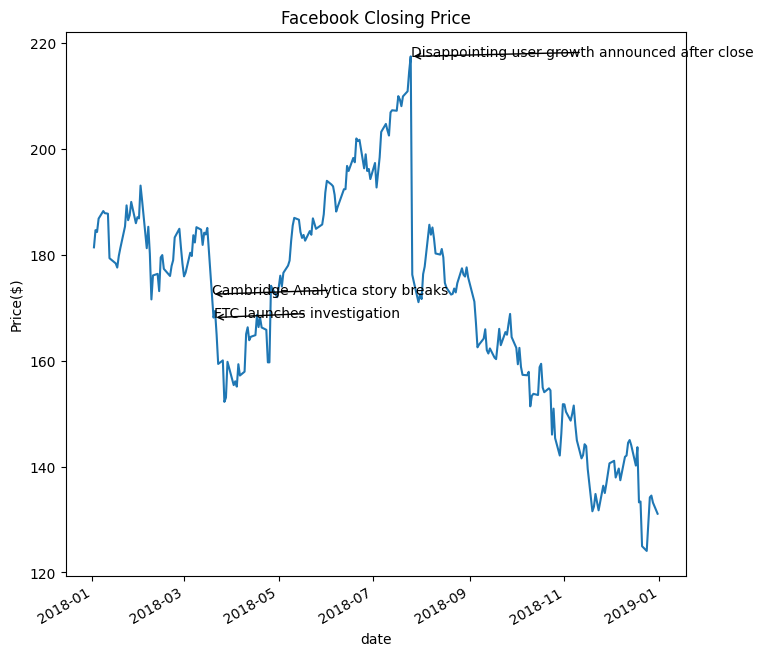

In [27]:
ax2 = df['close'].plot(kind='line',figsize=(8,8))

events = [('Disappointing user growth announced after close', '2018-07-25'),
          ('Cambridge Analytica story breaks', '2018-03-19'),
          ('FTC launches investigation', '2018-03-20')]

for i,j in events:
    value = df.close[j]
    plt.annotate(i,xy=(j,value),xytext=('2018-12-31',value+),arrowprops=dict(arrowstyle='->'))
    
plt.xlabel('date')
plt.ylabel('Price($)')
plt.title('Facebook Closing Price')
plt.show()